In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from analysis_functions import Analysis

In [17]:
results_path = "../../results/observables_uqc/uqc_2qubits_5layers_XX"

results = Analysis(results_path)

In [18]:
def flatten_gradients(gradients):
    for i in range(len(gradients)):
        for j in range(len(gradients[i])):
            gradients[i][j] = np.concatenate([lista.flatten() for lista in gradients[i][j]], axis = 0)


In [4]:
#gradients is a list of lists containing the gradients of each agent at every training step

gradients = results.get_gradients()

min_length = min([len(gradients[i]) for i in range(len(gradients))])

gradients = [gradients[i][:min_length] for i in range(len(gradients))]

flatten_gradients(gradients)

gradients_array = np.array(gradients)
print(gradients_array.shape)

magnitudes_gradients = np.linalg.norm(gradients_array, axis = 2)
print(magnitudes_gradients.shape)

mean_magnitudes_gradients = np.mean(magnitudes_gradients, axis = 0)
print(mean_magnitudes_gradients.shape)

std_magnitudes_gradients = np.std(magnitudes_gradients, axis = 0)
print(std_magnitudes_gradients.shape)

max_parameters_gradient = np.max(gradients_array, axis = 2)
max_parameters_gradient_index = np.argmax(gradients_array, axis = 2)

min_parameters_gradient = np.min(gradients_array, axis = 2)
min_parameters_gradient_index = np.argmin(gradients_array, axis = 2)

(5, 17447, 61)
(5, 17447)
(17447,)
(17447,)


It would be very cool if I could see to what type of parameters the maximum gradients belong to. To do that, I need to know what type of quantum circuit I have, the number of qubits and layers to find out to which type each index corresponds to.

For example, this data is for a UQC with 5 layers, 2 qubits and global skolik outscaling. Thus, the number of parameters is given by (4+1+1)*5*2 + 1 = 61 and the parameters are divided as follows:

 - First 10 parameters are the rotation parameters.
 - Next 40 parameters are the input encoding parameters.
 - Next 10 parameters are the biases.
 - Last parameter is the outscale parameter

([<matplotlib.axis.XTick at 0x7f82ccf418e0>,
 [Text(0, 0, 'Rotation'),
  Text(1, 0, 'Input Encoding'),
  Text(2, 0, 'Bias'),
  Text(3, 0, 'Output Scaling')])

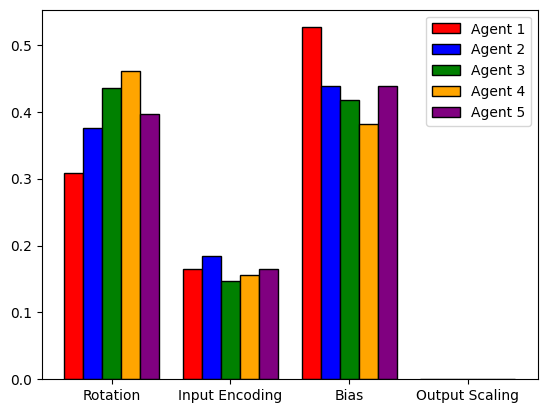

In [15]:
# Thus, if the index is between 0 and 9, the gradient is from the rotation parameters, if it is between 10 and 49, it is from the input encoding parameters,
# if it is between 50 and 59 it is a bias and if it is 60 it is the output encoding parameter. I want to group the gradients by type of parameter the max_parameters_gradient_index


def classify_gradient(list_of_indexes):
    new_list = []
    for i in range(len(list_of_indexes)):
        if list_of_indexes[i] < 10:
            new_list.append(0)
        elif list_of_indexes[i] < 50:
            new_list.append(1)
        elif list_of_indexes[i] < 60:
            new_list.append(2)
        else:
            new_list.append(3)
    return new_list

colors = ["red", "blue", "green", "orange", "purple"]
labels = [f"Agent {i+1}" for i in range(5)]
values = [classify_gradient(max_parameters_gradient_index[i]) for i in range(len(max_parameters_gradient_index))]

plt.hist(values, edgecolor = "black", bins = [-0.5,0.5,1.5,2.5,3.5], density = True, color = colors, label = labels)
plt.legend()

plt.xticks([0, 1, 2, 3], ["Rotation", "Input Encoding", "Bias", "Output Scaling"])